<!-- HTML file automatically generated from DocOnce source (https://github.com/doconce/doconce/)
doconce format html hw4.do.txt --no_mako -->
<!-- dom:TITLE: PHY321: Classical Mechanics 1 -->

## Exercise 5 (40pt), Bouncing object

This exercise builds on the code you wrote for solving homework 3.
We recommend strongly that you study the text of Malthe-Sørenssen, section 7.5.

In homework 3 we introduced gravity and air resistance and studied their
effects via a constant acceleration due to gravity and the force
arising from air resistance. But what happens when the ball hits the
floor? What if we would like to simulate the normal force from the
floor acting on the ball?  This exercise shows how we can include more
complicated forces with no pain! And the force we include here is an
example of a case where analytical solutions may either be difficult
to find or we cannot find an analytical solution at all.

We need then to include a force model for the normal force from the
floor on the ball. The simplest approach to such a system is to
introduce a contact force model represented by a spring model.  We
model the interaction between the floor and the ball as a single
spring. But the normal force is zero when there is no contact. Here we
define a simple model that allows us to include such effects in our
models.

The normal force from the floor on the ball is represented by a spring force. This
is a strong simplification of the actual deformation process occurring at the contact
between the ball and the floor due to the deformation of both the ball and the floor.

The deformed region corresponds roughly to the region of **overlap** between the
ball and the floor. The depth of this region is $\Delta y = R − y(t)$, where $R$
is the radius of the ball. This is supposed to represent the compression of the spring.
Our model for the normal force acting on the ball is then

$$
\boldsymbol{N} = −k (R − y(t)) \boldsymbol{e}_y.
$$

The normal force must act upward when $y < R$,
hence the sign must be negative.
However, we must also ensure that the normal force only acts when the ball is in
contact with the floor, otherwise the normal force is zero. The full formation of the
normal force is therefore

$$
\boldsymbol{N} = −k (R − y(t)) \boldsymbol{e}_y,
$$

when $y(t) < R$ and zero when $y(t) \ge R$.
In the numerical calculations you can choose $R=0.1$ m and the spring constant $k=1000$ N/m.

* 5a (10pt) Identify the forces acting on the ball and set up a diagram with the forces acting on the ball. Find the acceleration of the falling ball now with the normal force as well.

* 5b (10pt) Starting from the code that you write for HW3 Exercise 7 (or the posted solution), add the necessary lines of code to setup and compute these new forces (i.e., the normal interaction). What kind of [control structure](https://en.wikipedia.org/wiki/Control_flow) (e.g., `if`, `try`, `switch`) is helpful here? Write a short summary of your changes either as a comment or a separate cell. Make sure you explain the new calculations.

* 5c (10pt) Update the code to include a plot of the ball's height over time (i.e., $y$ vs $t$). How can you tell that the plot makes sense? What should we be looking for and how do you see those features in your plot? Again, write a short summary of your changes either as a comment or a separate cell. Make sure you explain the new calculations.

* 5d (10pt) Using different starting (initial) conditions (i.e., $v_0$, $y_0$) for the same choice of time step ($\Delta t$), when does your model break down? How can you tell? For reasonable values of $v_0$ and $y_0$ like in a physics lab, at what $\Delta t$ does your model break down? Again, how can you tell? What do these investigations indicate is important about choosing the integration time step ($\Delta t$) when modeling classical systems?

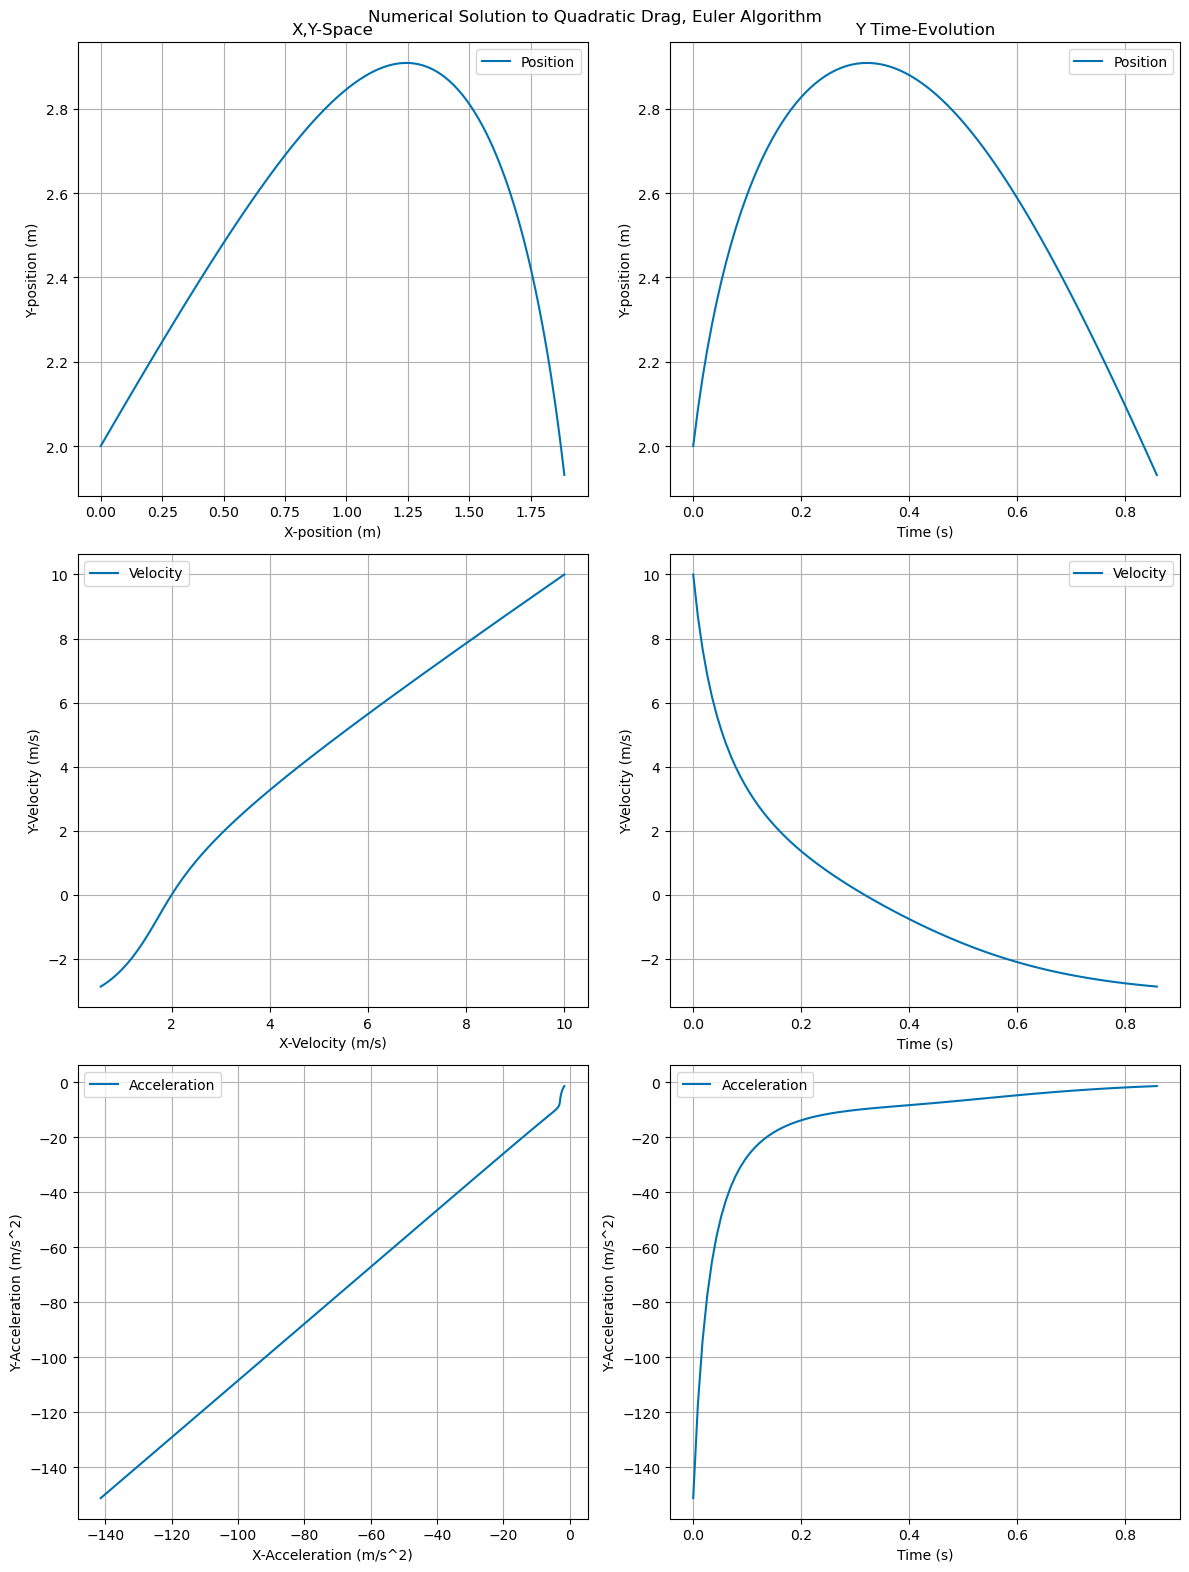

In [ ]:
#5b
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-v0_8-colorblind')

#CODE FROM HW3 PROBLEM 6B
#Initialize given variables
m = 0.2
g = 9.81
D = 0.2
k_normal = 1000 #NEW VARIABLE *********** Adding a new variable k_normal to initialize the bouncing constant of the normal force when the ball hits the ground.
t_0 = 0
t_f = 0.858
N = 100
t_aray,dt = np.linspace(t_0,t_f,N,endpoint=True,retstep=True)
#gives 99 values between t_0 and t_f, along with t_f at 
# the end, and retstep=True outputs the step size to
# dt.

r_aray = np.zeros((N,2))
v_aray = np.zeros((N,2))
a_aray = np.zeros((N,2))

r_aray[0] = [0,2]
v_aray[0] = [10,10]
a_aray[0] = [(-D*np.linalg.norm(v_aray[0])*v_aray[0][0])/m,
             -g-(D*np.linalg.norm(v_aray[0])*v_aray[0][1])/m]
#Define acceleration function
def a_vec(v_vec):
    return [
        -D*np.linalg.norm(v_vec)*v_vec[0]*(1/m),
        -g + -D*np.linalg.norm(v_vec)*v_vec[1]*(1/m)
        ]

#NEW NORMAL FORCE STUFF HERE****************** Here we use an if statement in the for loop that calculates the normal force and changes the acceleration accordingly to account for the bouncing.
for i in range(1,N):
    r_aray[i] = r_aray[i-1]+v_aray[i-1]*dt
    v_aray[i] = v_aray[i-1]+a_aray[i-1]*dt
    a_aray[i] = a_vec(v_aray[i])

    if r_aray[i][1] < 0:
        F_normal = k_normal * (-r_aray[i][1])
        a_aray[i][1] += F_normal / m
        r_aray[i][1] = 0
        if v_aray[i][1] < 0:
            v_aray[i][1] = 0
#for loop that updates our stuff.

r_aray = r_aray.transpose()
v_aray = v_aray.transpose()
a_aray = a_aray.transpose()

#plot them
fig, ax = plt.subplots(3,2,figsize=(12,16))
fig.suptitle("Numerical Solution to Quadratic Drag, Euler Algorithm")

ax[0][0].set_title("X,Y-Space")

ax[0][0].plot(r_aray[0],r_aray[1], label ="Position")
ax[0][0].set_ylabel("Y-position (m)")
ax[0][0].set_xlabel("X-position (m)")
ax[0][0].legend()
ax[0][0].grid(True)

ax[1][0].plot(v_aray[0],v_aray[1], label ="Velocity")
ax[1][0].set_ylabel("Y-Velocity (m/s)")
ax[1][0].set_xlabel("X-Velocity (m/s)")
ax[1][0].legend()
ax[1][0].grid(True)

ax[2][0].plot(a_aray[0],a_aray[1], label ="Acceleration")
ax[2][0].set_ylabel("Y-Acceleration (m/s^2)")
ax[2][0].set_xlabel("X-Acceleration (m/s^2)")
ax[2][0].legend()
ax[2][0].grid(True)

ax[0][1].set_title("Y Time-Evolution")

ax[0][1].plot(t_aray,r_aray[1], label ="Position")
ax[0][1].set_ylabel("Y-position (m)")
ax[0][1].set_xlabel("Time (s)")
ax[0][1].legend()
ax[0][1].grid(True)

ax[1][1].plot(t_aray,v_aray[1], label ="Velocity")
ax[1][1].set_ylabel("Y-Velocity (m/s)")
ax[1][1].set_xlabel("Time (s)")
ax[1][1].legend()
ax[1][1].grid(True)

ax[2][1].plot(t_aray,a_aray[1], label ="Acceleration")
ax[2][1].set_ylabel("Y-Acceleration (m/s^2)")
ax[2][1].set_xlabel("Time (s)")
ax[2][1].legend()
ax[2][1].grid(True)


plt.tight_layout()
plt.show()


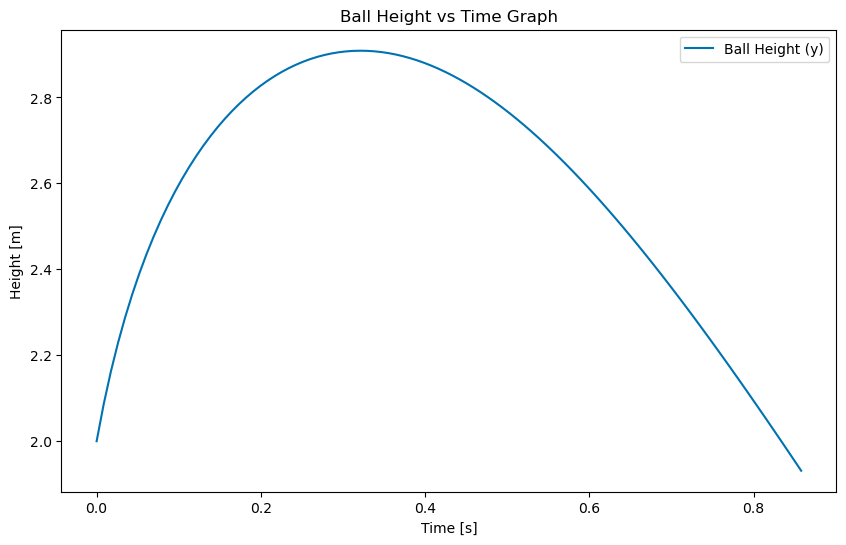

In [ ]:
#5c
#Creating new plot of Ball Height (y) vs time
plt.figure(figsize=(10,6))
plt.plot(t_aray, r_aray[1], label = 'Ball Height (y)') #Using new r_aray values that include the newly calculated normal forces
plt.xlabel('Time [s]')
plt.ylabel('Height [m]')
plt.title('Ball Height vs Time Graph')
plt.legend()
plt.show()
#Creating a simple plot like this using our newly calculated y position values using the normal force 
#can show us what a falling ball's height might look like with both drag and normal force


#We can see that this graph makes sense because after the ball is overcome by gravity after its initial throw upward, 
#it falls back down to earth at a slower rate than when it was thrown, 
#showing that there is resistive force acting on the ball

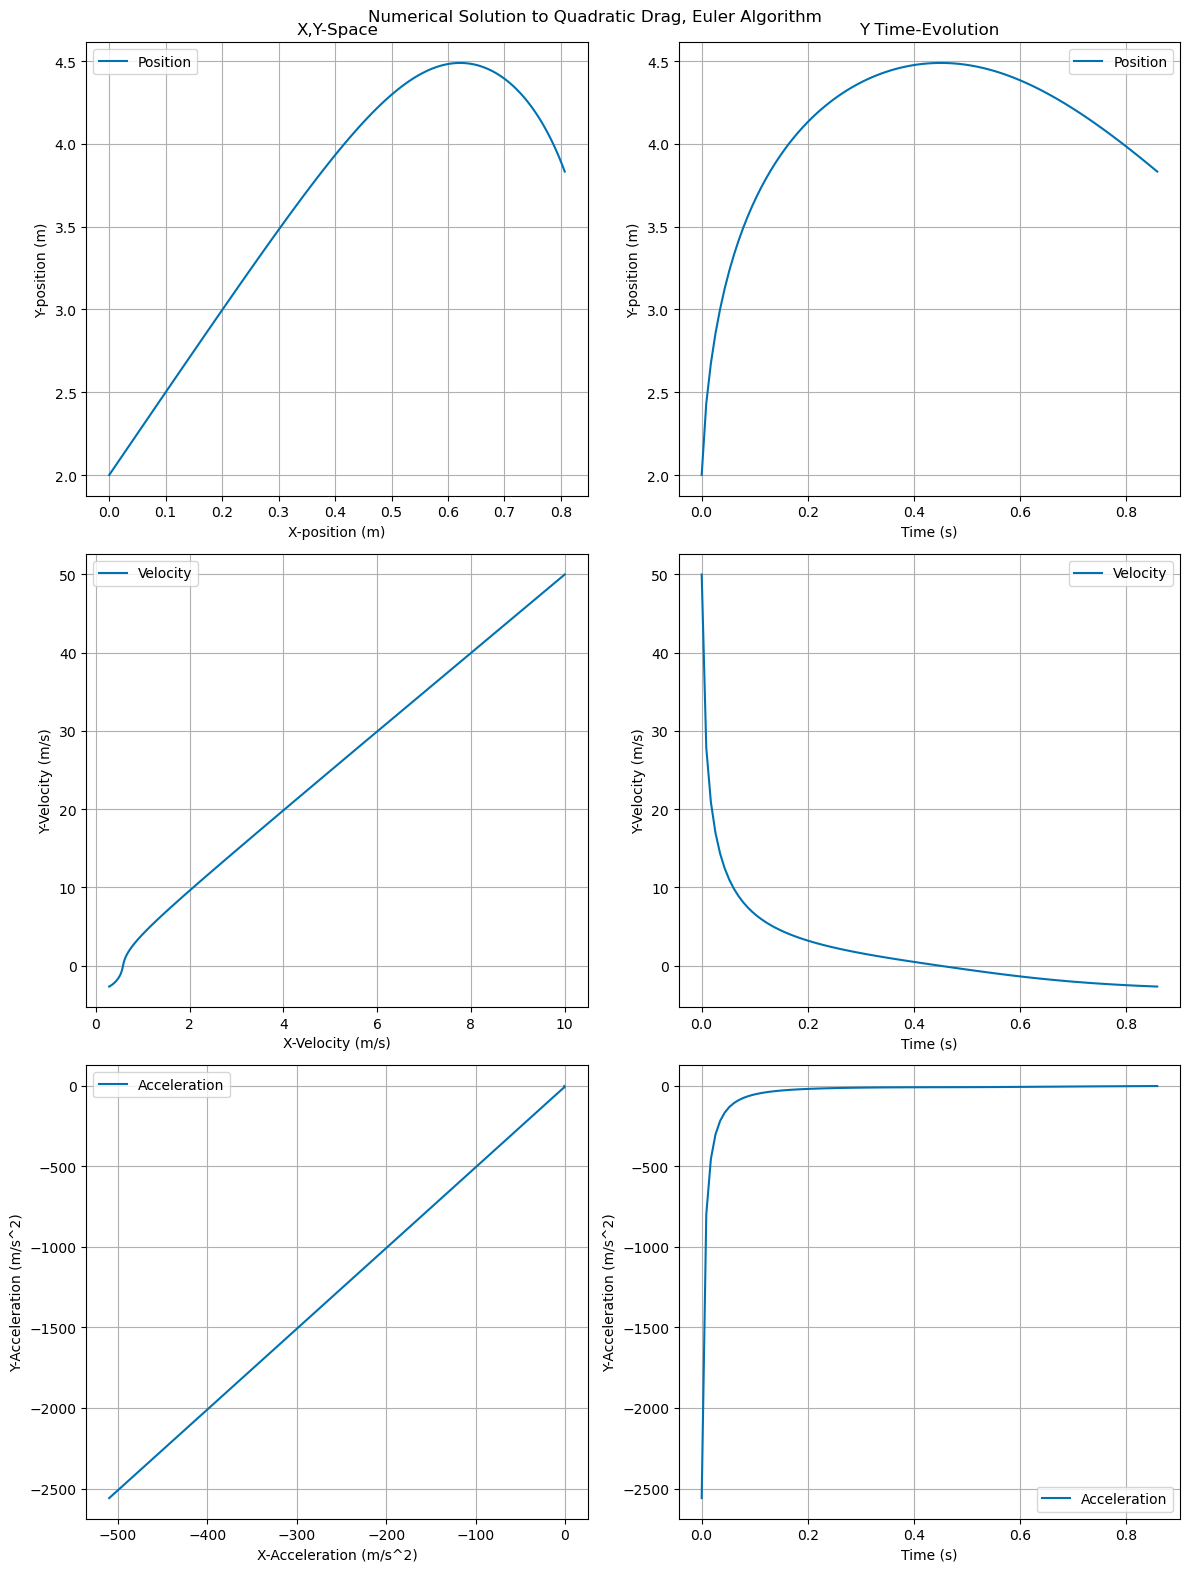

In [ ]:
#5d
#COPYING CODE FROM EARLIER FOR TESTING
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-v0_8-colorblind')

#CODE FROM HW3 PROBLEM 6B
#Initialize given variables
m = 0.2
g = 9.81
D = 0.2
k_normal = 1000 #NEW VARIABLE *********** Adding a new variable k_normal to initialize the bouncing constant of the normal force when the ball hits the ground.
t_0 = 0
t_f = 0.858
N = 100
t_aray,dt = np.linspace(t_0,t_f,N,endpoint=True,retstep=True)
#gives 99 values between t_0 and t_f, along with t_f at 
# the end, and retstep=True outputs the step size to
# dt.

r_aray = np.zeros((N,2))
v_aray = np.zeros((N,2))
a_aray = np.zeros((N,2))

r_aray[0] = [0,2]
v_aray[0] = [10,50]
a_aray[0] = [(-D*np.linalg.norm(v_aray[0])*v_aray[0][0])/m,
             -g-(D*np.linalg.norm(v_aray[0])*v_aray[0][1])/m]
#Define acceleration function
def a_vec(v_vec):
    return [
        -D*np.linalg.norm(v_vec)*v_vec[0]*(1/m),
        -g + -D*np.linalg.norm(v_vec)*v_vec[1]*(1/m)
        ]

#NEW NORMAL FORCE STUFF HERE****************** Here we use an if statement in the for loop that calculates the normal force and changes the acceleration accordingly to account for the bouncing.
for i in range(1,N):
    r_aray[i] = r_aray[i-1]+v_aray[i-1]*dt
    v_aray[i] = v_aray[i-1]+a_aray[i-1]*dt
    a_aray[i] = a_vec(v_aray[i])

    if r_aray[i][1] < 0:
        F_normal = k_normal * (-r_aray[i][1])
        a_aray[i][1] += F_normal / m
        r_aray[i][1] = 0
        if v_aray[i][1] < 0:
            v_aray[i][1] = 0
#for loop that updates our stuff.

r_aray = r_aray.transpose()
v_aray = v_aray.transpose()
a_aray = a_aray.transpose()

#plot them
fig, ax = plt.subplots(3,2,figsize=(12,16))
fig.suptitle("Numerical Solution to Quadratic Drag, Euler Algorithm")

ax[0][0].set_title("X,Y-Space")

ax[0][0].plot(r_aray[0],r_aray[1], label ="Position")
ax[0][0].set_ylabel("Y-position (m)")
ax[0][0].set_xlabel("X-position (m)")
ax[0][0].legend()
ax[0][0].grid(True)

ax[1][0].plot(v_aray[0],v_aray[1], label ="Velocity")
ax[1][0].set_ylabel("Y-Velocity (m/s)")
ax[1][0].set_xlabel("X-Velocity (m/s)")
ax[1][0].legend()
ax[1][0].grid(True)

ax[2][0].plot(a_aray[0],a_aray[1], label ="Acceleration")
ax[2][0].set_ylabel("Y-Acceleration (m/s^2)")
ax[2][0].set_xlabel("X-Acceleration (m/s^2)")
ax[2][0].legend()
ax[2][0].grid(True)

ax[0][1].set_title("Y Time-Evolution")

ax[0][1].plot(t_aray,r_aray[1], label ="Position")
ax[0][1].set_ylabel("Y-position (m)")
ax[0][1].set_xlabel("Time (s)")
ax[0][1].legend()
ax[0][1].grid(True)

ax[1][1].plot(t_aray,v_aray[1], label ="Velocity")
ax[1][1].set_ylabel("Y-Velocity (m/s)")
ax[1][1].set_xlabel("Time (s)")
ax[1][1].legend()
ax[1][1].grid(True)

ax[2][1].plot(t_aray,a_aray[1], label ="Acceleration")
ax[2][1].set_ylabel("Y-Acceleration (m/s^2)")
ax[2][1].set_xlabel("Time (s)")
ax[2][1].legend()
ax[2][1].grid(True)


plt.tight_layout()
plt.show()

#In this test, I changed the vy from 10 to 50. 
#These graphs do not provide a lot of information on the descent of the ball which is not good for obtaining good data.


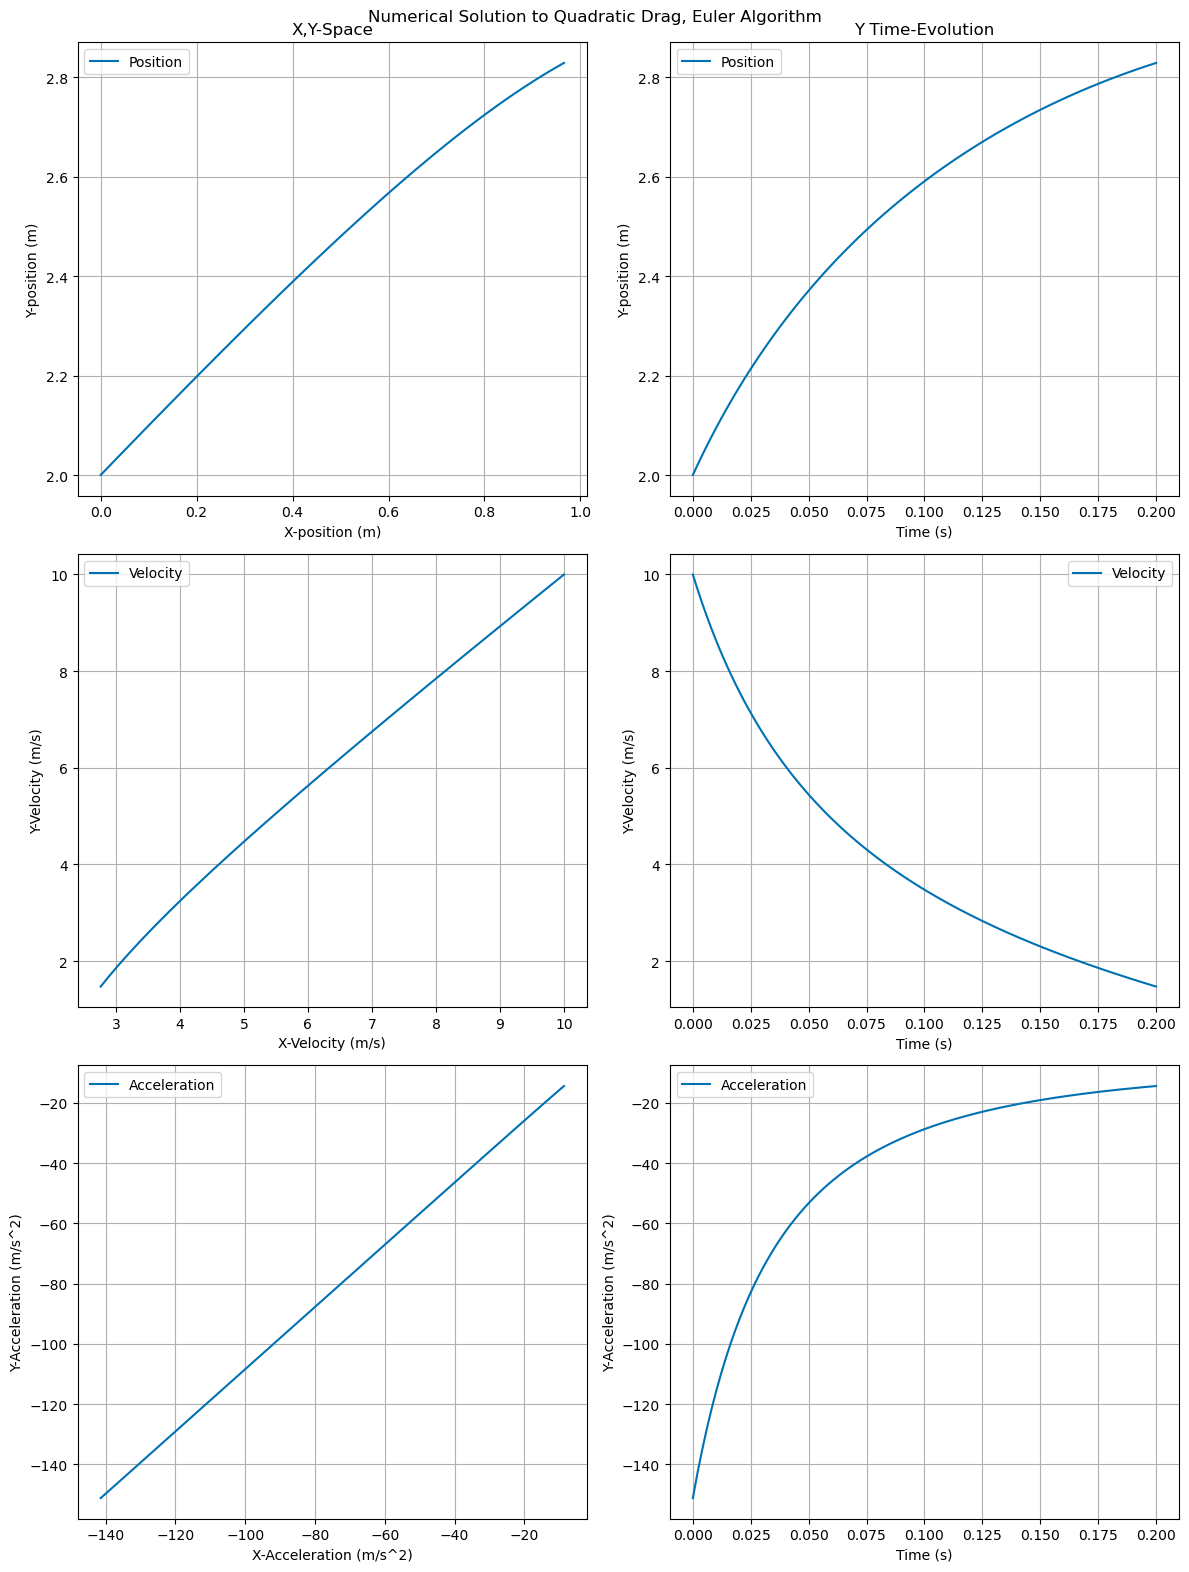

In [ ]:
#COPYING CODE AGAIN
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-v0_8-colorblind')

#CODE FROM HW3 PROBLEM 6B
#Initialize given variables
m = 0.2
g = 9.81
D = 0.2
k_normal = 1000 #NEW VARIABLE *********** Adding a new variable k_normal to initialize the bouncing constant of the normal force when the ball hits the ground.
t_0 = 0
t_f = 0.2
N = 100
t_aray,dt = np.linspace(t_0,t_f,N,endpoint=True,retstep=True)
#gives 99 values between t_0 and t_f, along with t_f at 
# the end, and retstep=True outputs the step size to
# dt.

r_aray = np.zeros((N,2))
v_aray = np.zeros((N,2))
a_aray = np.zeros((N,2))

r_aray[0] = [0,2]
v_aray[0] = [10,10]
a_aray[0] = [(-D*np.linalg.norm(v_aray[0])*v_aray[0][0])/m,
             -g-(D*np.linalg.norm(v_aray[0])*v_aray[0][1])/m]
#Define acceleration function
def a_vec(v_vec):
    return [
        -D*np.linalg.norm(v_vec)*v_vec[0]*(1/m),
        -g + -D*np.linalg.norm(v_vec)*v_vec[1]*(1/m)
        ]

#NEW NORMAL FORCE STUFF HERE****************** Here we use an if statement in the for loop that calculates the normal force and changes the acceleration accordingly to account for the bouncing.
for i in range(1,N):
    r_aray[i] = r_aray[i-1]+v_aray[i-1]*dt
    v_aray[i] = v_aray[i-1]+a_aray[i-1]*dt
    a_aray[i] = a_vec(v_aray[i])

    if r_aray[i][1] < 0:
        F_normal = k_normal * (-r_aray[i][1])
        a_aray[i][1] += F_normal / m
        r_aray[i][1] = 0
        if v_aray[i][1] < 0:
            v_aray[i][1] = 0
#for loop that updates our stuff.

r_aray = r_aray.transpose()
v_aray = v_aray.transpose()
a_aray = a_aray.transpose()

#plot them
fig, ax = plt.subplots(3,2,figsize=(12,16))
fig.suptitle("Numerical Solution to Quadratic Drag, Euler Algorithm")

ax[0][0].set_title("X,Y-Space")

ax[0][0].plot(r_aray[0],r_aray[1], label ="Position")
ax[0][0].set_ylabel("Y-position (m)")
ax[0][0].set_xlabel("X-position (m)")
ax[0][0].legend()
ax[0][0].grid(True)

ax[1][0].plot(v_aray[0],v_aray[1], label ="Velocity")
ax[1][0].set_ylabel("Y-Velocity (m/s)")
ax[1][0].set_xlabel("X-Velocity (m/s)")
ax[1][0].legend()
ax[1][0].grid(True)

ax[2][0].plot(a_aray[0],a_aray[1], label ="Acceleration")
ax[2][0].set_ylabel("Y-Acceleration (m/s^2)")
ax[2][0].set_xlabel("X-Acceleration (m/s^2)")
ax[2][0].legend()
ax[2][0].grid(True)

ax[0][1].set_title("Y Time-Evolution")

ax[0][1].plot(t_aray,r_aray[1], label ="Position")
ax[0][1].set_ylabel("Y-position (m)")
ax[0][1].set_xlabel("Time (s)")
ax[0][1].legend()
ax[0][1].grid(True)

ax[1][1].plot(t_aray,v_aray[1], label ="Velocity")
ax[1][1].set_ylabel("Y-Velocity (m/s)")
ax[1][1].set_xlabel("Time (s)")
ax[1][1].legend()
ax[1][1].grid(True)

ax[2][1].plot(t_aray,a_aray[1], label ="Acceleration")
ax[2][1].set_ylabel("Y-Acceleration (m/s^2)")
ax[2][1].set_xlabel("Time (s)")
ax[2][1].legend()
ax[2][1].grid(True)


plt.tight_layout()
plt.show()

#In this test, I changed the t_final to 0.2 seconds rather than 0.858. 
#This graph does not show the balls descent at all and does not provide adaquate data at all.


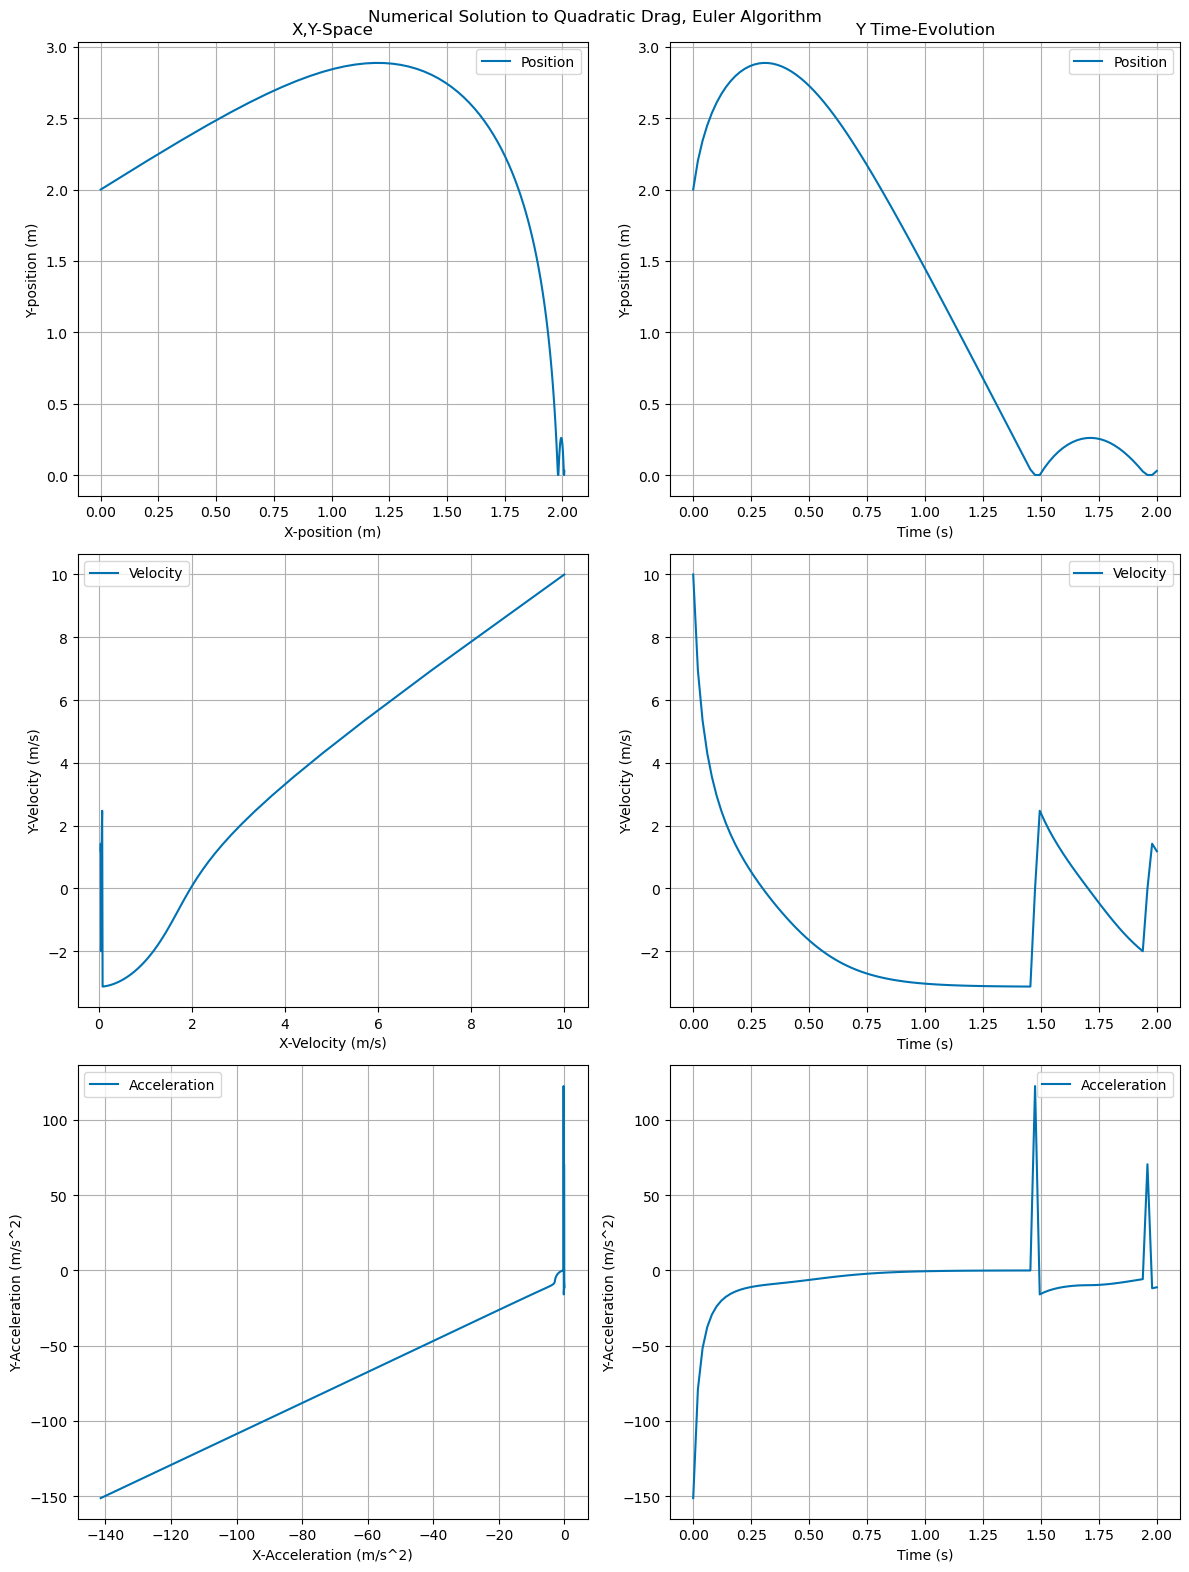

In [ ]:
#COPYING CODE
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-v0_8-colorblind')

#CODE FROM HW3 PROBLEM 6B
#Initialize given variables
m = 0.2
g = 9.81
D = 0.2
k_normal = 1000 #NEW VARIABLE *********** Adding a new variable k_normal to initialize the bouncing constant of the normal force when the ball hits the ground.
t_0 = 0
t_f = 2
N = 100
t_aray,dt = np.linspace(t_0,t_f,N,endpoint=True,retstep=True)
#gives 99 values between t_0 and t_f, along with t_f at 
# the end, and retstep=True outputs the step size to
# dt.

r_aray = np.zeros((N,2))
v_aray = np.zeros((N,2))
a_aray = np.zeros((N,2))

r_aray[0] = [0,2]
v_aray[0] = [10,10]
a_aray[0] = [(-D*np.linalg.norm(v_aray[0])*v_aray[0][0])/m,
             -g-(D*np.linalg.norm(v_aray[0])*v_aray[0][1])/m]
#Define acceleration function
def a_vec(v_vec):
    return [
        -D*np.linalg.norm(v_vec)*v_vec[0]*(1/m),
        -g + -D*np.linalg.norm(v_vec)*v_vec[1]*(1/m)
        ]

#NEW NORMAL FORCE STUFF HERE****************** Here we use an if statement in the for loop that calculates the normal force and changes the acceleration accordingly to account for the bouncing.
for i in range(1,N):
    r_aray[i] = r_aray[i-1]+v_aray[i-1]*dt
    v_aray[i] = v_aray[i-1]+a_aray[i-1]*dt
    a_aray[i] = a_vec(v_aray[i])

    if r_aray[i][1] < 0:
        F_normal = k_normal * (-r_aray[i][1])
        a_aray[i][1] += F_normal / m
        r_aray[i][1] = 0
        if v_aray[i][1] < 0:
            v_aray[i][1] = 0
#for loop that updates our stuff.

r_aray = r_aray.transpose()
v_aray = v_aray.transpose()
a_aray = a_aray.transpose()

#plot them
fig, ax = plt.subplots(3,2,figsize=(12,16))
fig.suptitle("Numerical Solution to Quadratic Drag, Euler Algorithm")

ax[0][0].set_title("X,Y-Space")

ax[0][0].plot(r_aray[0],r_aray[1], label ="Position")
ax[0][0].set_ylabel("Y-position (m)")
ax[0][0].set_xlabel("X-position (m)")
ax[0][0].legend()
ax[0][0].grid(True)

ax[1][0].plot(v_aray[0],v_aray[1], label ="Velocity")
ax[1][0].set_ylabel("Y-Velocity (m/s)")
ax[1][0].set_xlabel("X-Velocity (m/s)")
ax[1][0].legend()
ax[1][0].grid(True)

ax[2][0].plot(a_aray[0],a_aray[1], label ="Acceleration")
ax[2][0].set_ylabel("Y-Acceleration (m/s^2)")
ax[2][0].set_xlabel("X-Acceleration (m/s^2)")
ax[2][0].legend()
ax[2][0].grid(True)

ax[0][1].set_title("Y Time-Evolution")

ax[0][1].plot(t_aray,r_aray[1], label ="Position")
ax[0][1].set_ylabel("Y-position (m)")
ax[0][1].set_xlabel("Time (s)")
ax[0][1].legend()
ax[0][1].grid(True)

ax[1][1].plot(t_aray,v_aray[1], label ="Velocity")
ax[1][1].set_ylabel("Y-Velocity (m/s)")
ax[1][1].set_xlabel("Time (s)")
ax[1][1].legend()
ax[1][1].grid(True)

ax[2][1].plot(t_aray,a_aray[1], label ="Acceleration")
ax[2][1].set_ylabel("Y-Acceleration (m/s^2)")
ax[2][1].set_xlabel("Time (s)")
ax[2][1].legend()
ax[2][1].grid(True)


plt.tight_layout()
plt.show()

#In this test, I increased the t_final to 2 seconds. This graph shows the bouncing effect, but it is very compressed.
#This means that the timestep is too large for this long simulation and needs to be decreased.


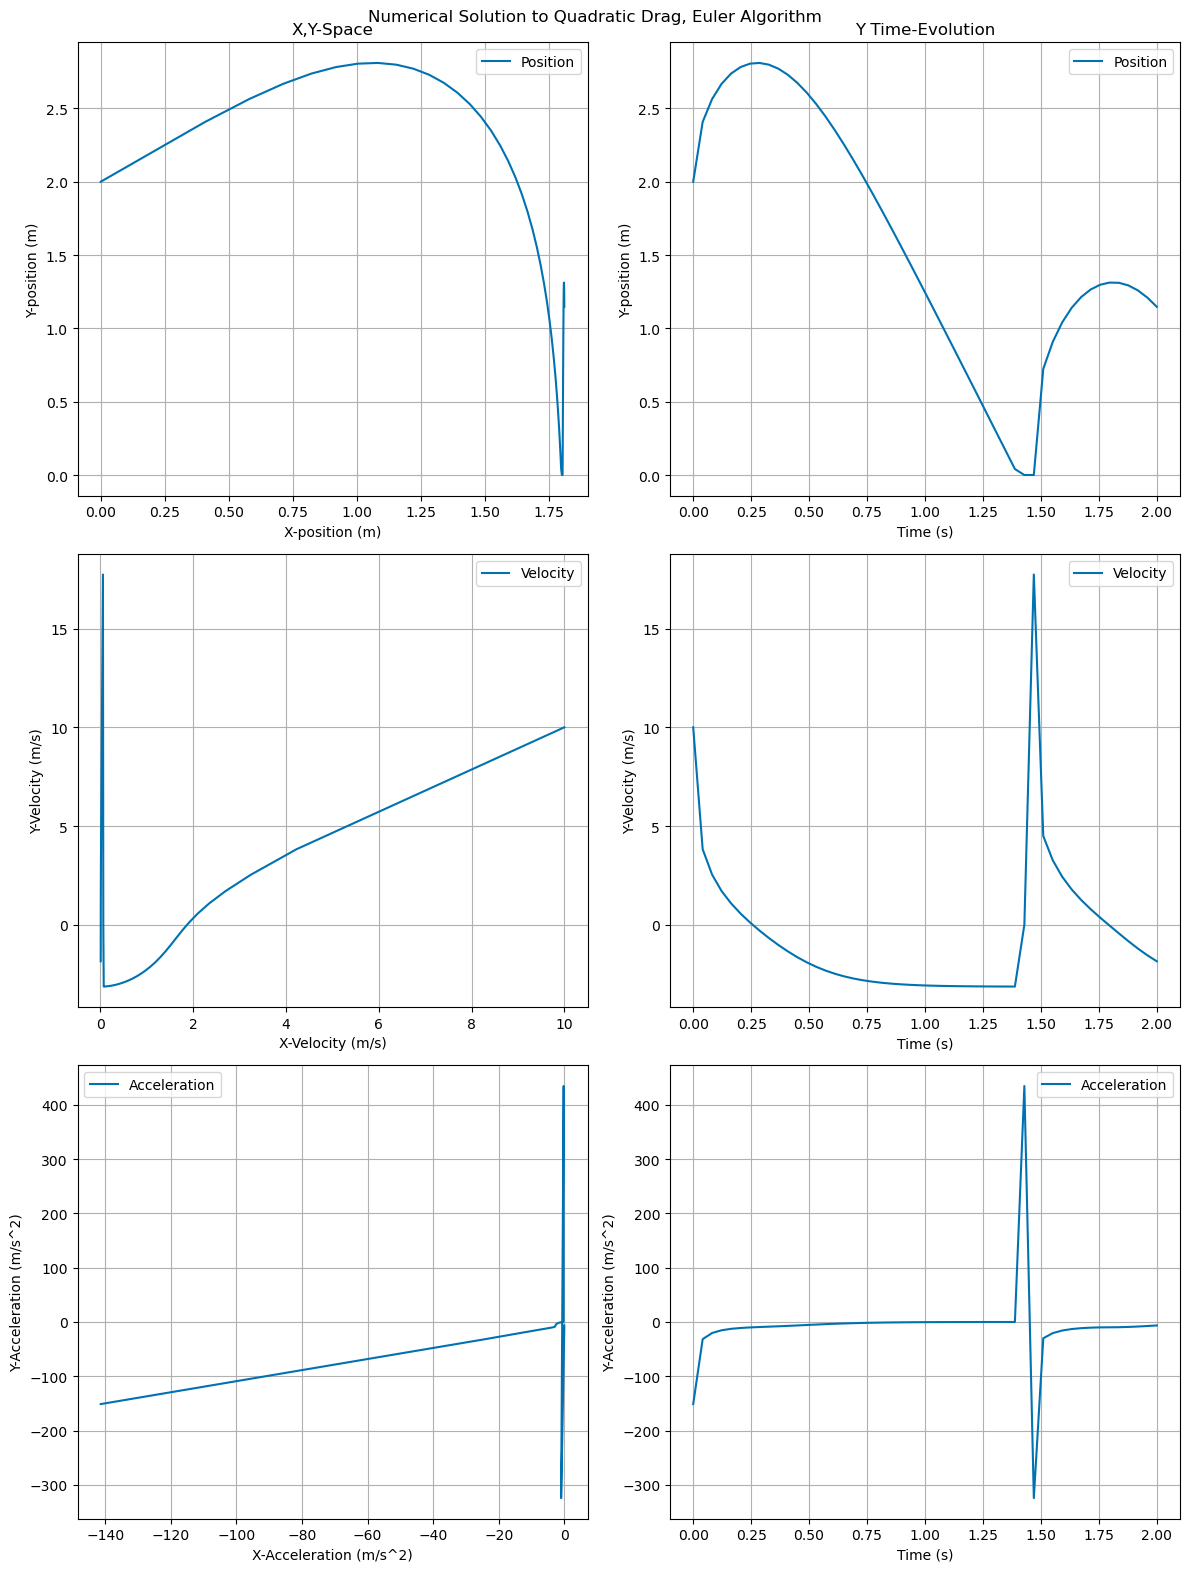

In [ ]:
#COPYING CODE ONCE MORE
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-v0_8-colorblind')

#CODE FROM HW3 PROBLEM 6B
#Initialize given variables
m = 0.2
g = 9.81
D = 0.2
k_normal = 1000 #NEW VARIABLE *********** Adding a new variable k_normal to initialize the bouncing constant of the normal force when the ball hits the ground.
t_0 = 0
t_f = 2
N = 50
t_aray,dt = np.linspace(t_0,t_f,N,endpoint=True,retstep=True)
#gives 99 values between t_0 and t_f, along with t_f at 
# the end, and retstep=True outputs the step size to
# dt.

r_aray = np.zeros((N,2))
v_aray = np.zeros((N,2))
a_aray = np.zeros((N,2))

r_aray[0] = [0,2]
v_aray[0] = [10,10]
a_aray[0] = [(-D*np.linalg.norm(v_aray[0])*v_aray[0][0])/m,
             -g-(D*np.linalg.norm(v_aray[0])*v_aray[0][1])/m]
#Define acceleration function
def a_vec(v_vec):
    return [
        -D*np.linalg.norm(v_vec)*v_vec[0]*(1/m),
        -g + -D*np.linalg.norm(v_vec)*v_vec[1]*(1/m)
        ]

#NEW NORMAL FORCE STUFF HERE****************** Here we use an if statement in the for loop that calculates the normal force and changes the acceleration accordingly to account for the bouncing.
for i in range(1,N):
    r_aray[i] = r_aray[i-1]+v_aray[i-1]*dt
    v_aray[i] = v_aray[i-1]+a_aray[i-1]*dt
    a_aray[i] = a_vec(v_aray[i])

    if r_aray[i][1] < 0:
        F_normal = k_normal * (-r_aray[i][1])
        a_aray[i][1] += F_normal / m
        r_aray[i][1] = 0
        if v_aray[i][1] < 0:
            v_aray[i][1] = 0
#for loop that updates our stuff.

r_aray = r_aray.transpose()
v_aray = v_aray.transpose()
a_aray = a_aray.transpose()

#plot them
fig, ax = plt.subplots(3,2,figsize=(12,16))
fig.suptitle("Numerical Solution to Quadratic Drag, Euler Algorithm")

ax[0][0].set_title("X,Y-Space")

ax[0][0].plot(r_aray[0],r_aray[1], label ="Position")
ax[0][0].set_ylabel("Y-position (m)")
ax[0][0].set_xlabel("X-position (m)")
ax[0][0].legend()
ax[0][0].grid(True)

ax[1][0].plot(v_aray[0],v_aray[1], label ="Velocity")
ax[1][0].set_ylabel("Y-Velocity (m/s)")
ax[1][0].set_xlabel("X-Velocity (m/s)")
ax[1][0].legend()
ax[1][0].grid(True)

ax[2][0].plot(a_aray[0],a_aray[1], label ="Acceleration")
ax[2][0].set_ylabel("Y-Acceleration (m/s^2)")
ax[2][0].set_xlabel("X-Acceleration (m/s^2)")
ax[2][0].legend()
ax[2][0].grid(True)

ax[0][1].set_title("Y Time-Evolution")

ax[0][1].plot(t_aray,r_aray[1], label ="Position")
ax[0][1].set_ylabel("Y-position (m)")
ax[0][1].set_xlabel("Time (s)")
ax[0][1].legend()
ax[0][1].grid(True)

ax[1][1].plot(t_aray,v_aray[1], label ="Velocity")
ax[1][1].set_ylabel("Y-Velocity (m/s)")
ax[1][1].set_xlabel("Time (s)")
ax[1][1].legend()
ax[1][1].grid(True)

ax[2][1].plot(t_aray,a_aray[1], label ="Acceleration")
ax[2][1].set_ylabel("Y-Acceleration (m/s^2)")
ax[2][1].set_xlabel("Time (s)")
ax[2][1].legend()
ax[2][1].grid(True)


plt.tight_layout()
plt.show()

#In this final test, I kept the t_final at 2 seconds, but I decreased the amount of values found from 100 to 50.
#This graph shows one bounce and provides a better visual of how the ball behaves.


5d Summary;

For variable values of v0 and y0, having a higher velocity makes the simulation quicker, meaning you need a smaller timestep deltaT. Having a longer y0 will cause the simulation to run longer, thus creating more error. Adding a stronger value for drag will cause more rapid changes in the simulations acceleration which will also require a smaller timestep and accumulate more error. While these changes do not inherently break the simulation, they do cause it to become more unstable which causes more error in the data collected. This effect can also be seen when the timestep is increased to larger steps. A timestep too large for the physics to be viewed accurately will yield unusable data. Realizing all of these factors, when choosing proper values in a simulation like this, prioritize choosing a small timestep to ensure accurate data. If the simulation has fast motion, a small timestep is also needed to ensure enough data is found in the smaller time. One test you can apply to a simulation like this is to keep decreasing the deltaT until the data does not seem to change anymore. This visual will ensure you have the best timestep possible for your situation.

# Extra Credit — Integrating Research 

:::{admonition} Earning and Submitting Your Summary
:class: alert
Earn up to 5 extra credit points per homework by engaging with MSU research activities. These points can boost your grade above 100% or help offset missed exercises.

**Send via email to Danny <caball14@msu.edu>**
:::

Earn up to 5 extra credit points per homework by engaging with MSU research activities. These points can boost your grade above 100% or help offset missed exercises.

To receive full credit:

1. **Attend** an MSU research talk (see approved clubs and seminars below).
2. **Write** a summary of the talk (at least 150 words).
3. **Submit** your summary with your homework (email to <caball14@msu.edu>).

**Approved talks include:**
- Society for Physics Students (SPS): Meets Monday nights (alternates with Astronomy Club)
- Astronomy Club: Meets Monday nights (alternates with SPS)
- Any [physics and astronomy seminar](https://pa.msu.edu/news-events-seminars/index.aspx) of interest
- Any MSU research seminar/workshop relevant to physics (get approval if unsure)
- Any other physics-related event approved in advance

If you have questions, please contact Danny.

**Note:** You can earn 5% extra credit on each homework by attending a seminar, workshop, or other physics-related event and submitting a short reflection (about 150 words) on your experience.